In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**DataScience Always Bring Something Meaningful**

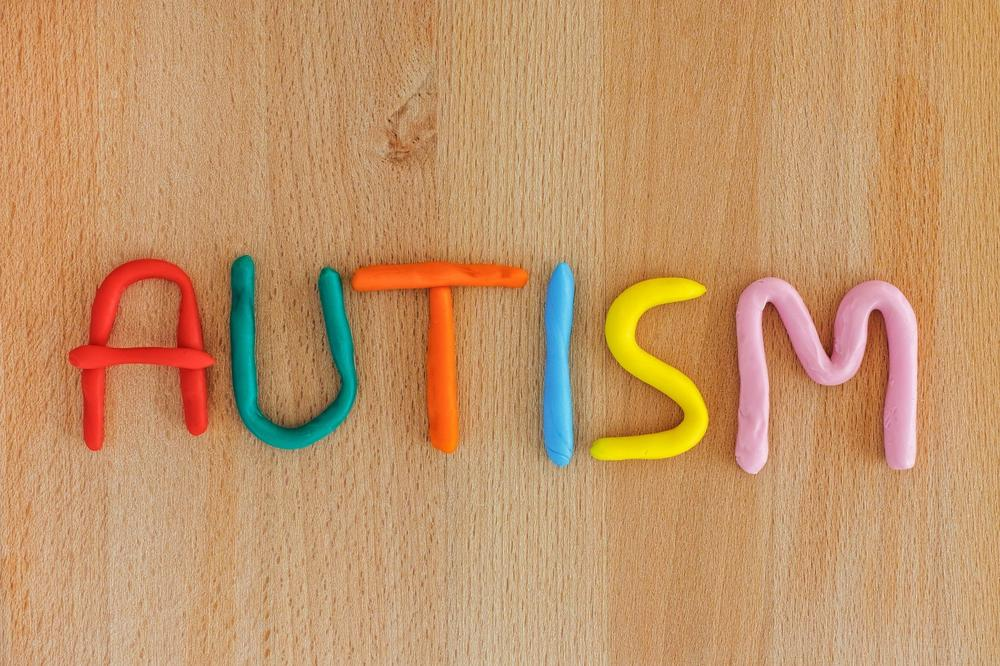

**What is Autism ?**

Autism, also known as autism spectrum disorder, is a broad range of conditions that affect communication and behavior, usually appearing by age 2. The Centers for Disease Control and Prevention (CDC) reports that **autism affects 1 in 54 children.**

People with autism may have difficulty with communication and social interaction; restricted interests and repetitive behaviors; and inability to function effectively in school, work, and other areas of life.

**What Causes Autism?**

Studies indicate the rate of autism is rising, but causes are not well-understood. Scientists have found rare gene changes, or mutations, as well as small common genetic variations in people with autism, implying a genetic component. A growing area of research focuses on interaction of genetic and environmental factors. For example, a woman’s exposure to harmful contaminants during pregnancy may trigger a genetic mutation leading to autism in her child. No link has been found between autism and vaccines, including those containing thimerosal, a mercury-based compound.


**What Environmental Factors May Be Associated With Autism ?**

Progress has been made toward understanding different environmental risk factors, and the clearest evidence involves events before and during birth, such as:

- Advanced parental age at time of conception
- Prenatal exposure to air pollution or certain pesticides
- Maternal obesity, diabetes, or immune system disorders
- Extreme prematurity or very low birth weight
- Any birth difficulty leading to periods of oxygen deprivation to the baby’s brain

The exact cause of ASD is unknown. The most current research demonstrates there’s no single cause.

**Some Suspected Risk factors for ASD include:**

Having an immediate family member who’s autistic
certain genetic mutations
fragile X syndrome and other genetic disorders
being born to older parents
low birth weight
metabolic imbalances
exposure to heavy metals and environmental toxins
a maternal history of viral infections
fetal exposure to the medications valproic acid or thalidomide (Thalomid)

**An ASD diagnosis involves:**

- several screenings
- genetic tests
- evaluations


**What we are looking for ?**
- Connection between Age
- Connection between Gender
- Connection between an immediate family member has been diagnosed with autism
- Specific Geographic location having maximum no. of Cases of Autism
- Connection between Jaundice & Autism

**Why it Matters ?**
- Early Screening can reduce Autism
- Many concerns arise as a result of beng the costs
- Leads to a more personalized & early stage treatment 

**What is the prupose ?**

Aimed to Improve Diagnosis of Autism/ASD by training  Autism dataset witha amachine learning model which leads to more more personalized and early stage developemnt

**Columns**
- ID - ID of the patient
- A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item  screening tool
- age - Age of the patient in years
- gender - Gender of the patient
- ethnicity - Ethnicity of the patient
- jaundice - Whether the patient had jaundice at the time of birth
- autism - Whether an immediate family member has been diagnosed with autism
- contry_of_res - Country of residence of the patient
- used_app_before - Whether the patient has undergone a screening test before
- result - Score for AQ1-10 screening test
- age_desc - Age of the patient
- relation - Relation of patient who completed the test
- Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 - represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

In [235]:
df = pd.read_csv('train.csv')
tdf = pd.read_csv('test.csv')
df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18.605397,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,1,13.829369,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,1,14.679893,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,0,61.035288,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,1,14.256686,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,1,1,1,1,1,1,1,1,1,1,42.084907,f,White-European,no,yes,United States,no,13.390868,18 and more,Self,1
796,797,1,1,0,0,1,0,0,0,1,1,17.669291,f,Asian,no,no,New Zealand,no,9.454201,18 and more,Self,0
797,798,0,0,0,0,0,0,1,0,1,1,18.242557,m,White-European,yes,no,Jordan,no,6.805509,18 and more,Self,1
798,799,1,1,1,1,1,1,0,1,1,1,19.241473,f,Middle Eastern,no,yes,United States,no,3.682732,18 and more,Relative,0


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [237]:
df.shape

(800, 22)

In [238]:
df.apply(lambda x: len(x.unique()))

ID                 800
A1_Score             2
A2_Score             2
A3_Score             2
A4_Score             2
A5_Score             2
A6_Score             2
A7_Score             2
A8_Score             2
A9_Score             2
A10_Score            2
age                800
gender               2
ethnicity           12
jaundice             2
austim               2
contry_of_res       61
used_app_before      2
result             800
age_desc             1
relation             6
Class/ASD            2
dtype: int64

In [239]:
df.apply(lambda col: col.unique())

ID                 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
A1_Score                                                      [1, 0]
A2_Score                                                      [0, 1]
A3_Score                                                      [1, 0]
A4_Score                                                      [1, 0]
A5_Score                                                      [1, 0]
A6_Score                                                      [1, 0]
A7_Score                                                      [0, 1]
A8_Score                                                      [1, 0]
A9_Score                                                      [1, 0]
A10_Score                                                     [1, 0]
age                [18.60539681, 13.82936938, 14.67989264, 61.035...
gender                                                        [f, m]
ethnicity          [White-European, South Asian, Black, Asian, Mi...
jaundice                          

# **EDA**

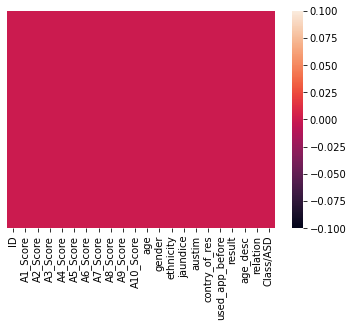

In [240]:
sns.heatmap(df.isnull(),yticklabels=False)

In [241]:
df_asd = df[df['Class/ASD'] == 1]
df_not_asd = df[df['Class/ASD'] == 0]

print('Total No. of Passengers :',len(df))

print('Total No. of Non ASD :',len(df_not_asd))
print('Total No. of Non ASD %:',len(df_not_asd)/len(df) * 100 ,"%")
print('Total No. of ASD:',len(df_asd))
print('Total No. of ASD %:',len(df_asd)/len(df) * 100 ,"%")

Total No. of Passengers : 800
Total No. of Non ASD : 615
Total No. of Non ASD %: 76.875 %
Total No. of ASD: 185
Total No. of ASD %: 23.125 %


In [242]:
df_asd.mean().compare(df_not_asd.mean())

,self,other
ID,426.470270,392.687805
A1_Score,0.843243,0.504065
A2_Score,0.600000,0.191870
A3_Score,0.789189,0.180488
A4_Score,0.875676,0.276423
A5_Score,0.864865,0.334959
A6_Score,0.610811,0.087805
A7_Score,0.594595,0.177236
A8_Score,0.897297,0.663415
A9_Score,0.772973,0.178862


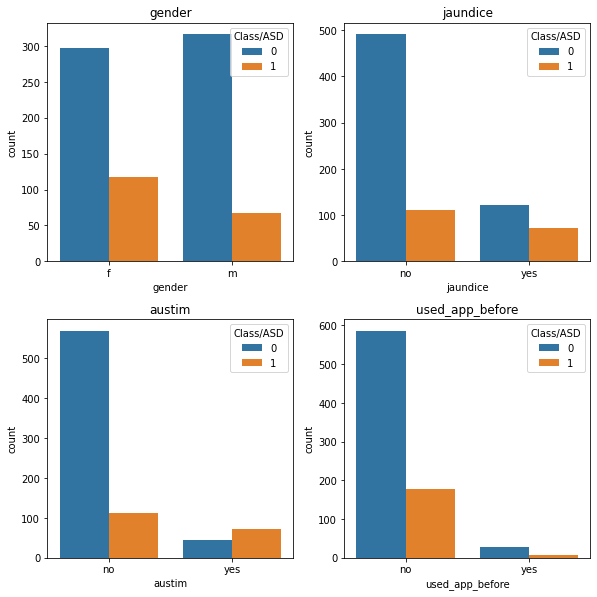

In [243]:
var_bar = ['gender', 'jaundice', 'austim','used_app_before']

no_rows = 2
no_cols = 2

fig, axs = plt.subplots(no_rows, no_cols, figsize = (no_cols * 4.2,no_rows * 4.2) )

for r in range(0, no_rows):
  for c in range(0, no_cols):
    i = r*no_cols + c 
    ax = axs[r][c]
    sns.countplot(df[var_bar[i]], hue=df['Class/ASD'], ax=ax)
    ax.set_title(var_bar[i])
    ax.legend(title='Class/ASD', loc = 'upper right')

  plt.tight_layout()

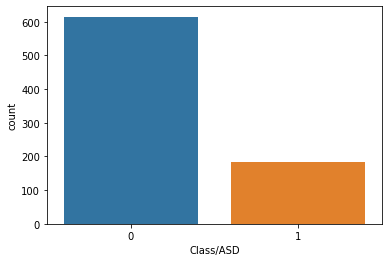

In [244]:
sns.countplot(df['Class/ASD'])

In [245]:
df['Class/ASD'].value_counts()

0    615
1    185
Name: Class/ASD, dtype: int64

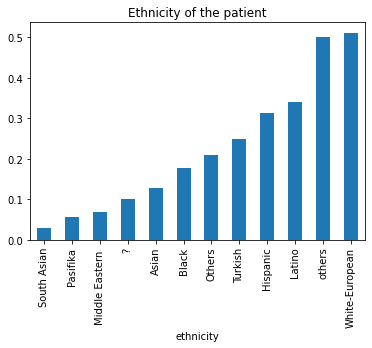

In [246]:
df.groupby('ethnicity')['Class/ASD'].mean().sort_values().plot.bar()
plt.title('Ethnicity of the patient')
plt.xticks(rotation=90);

Half of White-European in this dataset was observed with autism

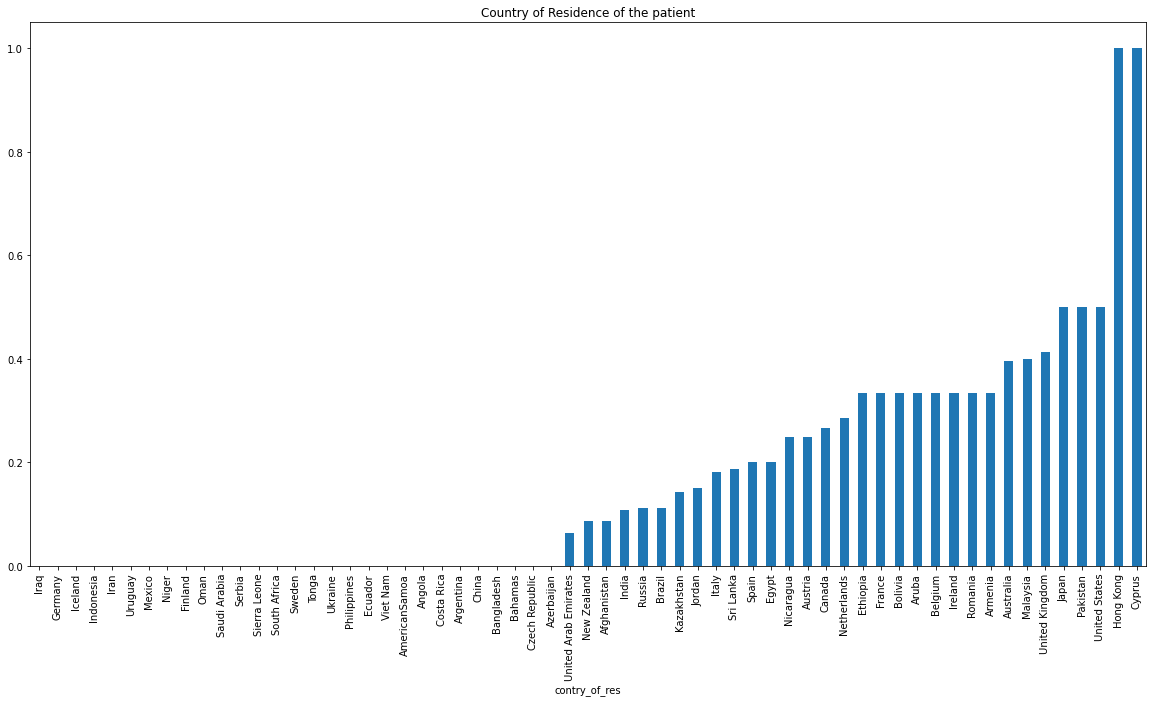

In [247]:
plt.figure(figsize=(20,10))
df.groupby('contry_of_res')['Class/ASD'].mean().sort_values().plot.bar()
plt.title('Country of Residence of the patient')
plt.xticks(rotation=90);

Half of the countries don't have any cases
Japan, Pakistan, United States have half of observed Autism
Hong Kong & Cyprus has most chances of observed Autism


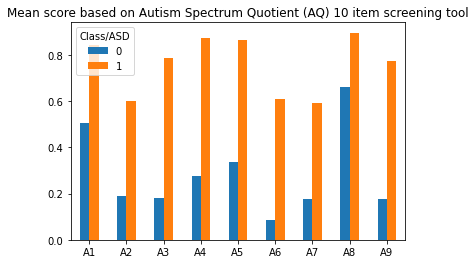

In [248]:
score_features = df.filter(regex='A[0-9]_', axis=1).columns.tolist()
df.groupby('Class/ASD')[score_features].mean().T.plot.bar()
plt.title('Mean score based on Autism Spectrum Quotient (AQ) 10 item screening tool')
plt.xticks(ticks=range(len(score_features)), labels=[x.split('_')[0] for x in score_features], rotation=0);

Patients with high scores have high chance of Autism

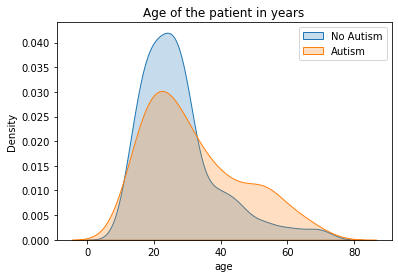

In [249]:
sns.kdeplot(x='age', data=df[df['Class/ASD'] == 0], shade=True, label='No Autism')
sns.kdeplot(x='age', data=df[df['Class/ASD'] == 1], shade=True, label='Autism')
plt.title('Age of the patient in years')
plt.legend();

The difference appears when the age becomes larger

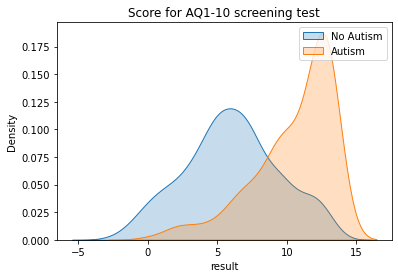

In [250]:
sns.kdeplot(x='result', data=df[df['Class/ASD'] == 0], shade=True, label='No Autism')
sns.kdeplot(x='result', data=df[df['Class/ASD'] == 1], shade=True, label='Autism')
plt.title('Score for AQ1-10 screening test')
plt.legend();

The distribution of result for pacients without autism is pretty simetric, with mean close to 5. In the other way, most of the pacients with autism shows bigger result values.

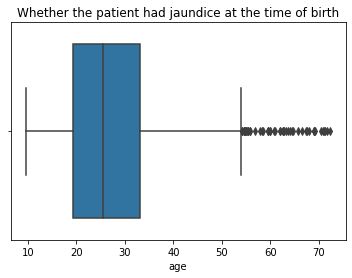

In [251]:
plt.title('Whether the patient had jaundice at the time of birth')
sns.boxplot(data=df,x='age')

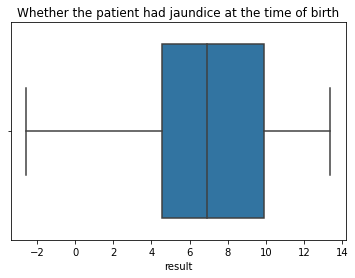

In [252]:
plt.title('Whether the patient had jaundice at the time of birth')
sns.boxplot(data=df,x='result')

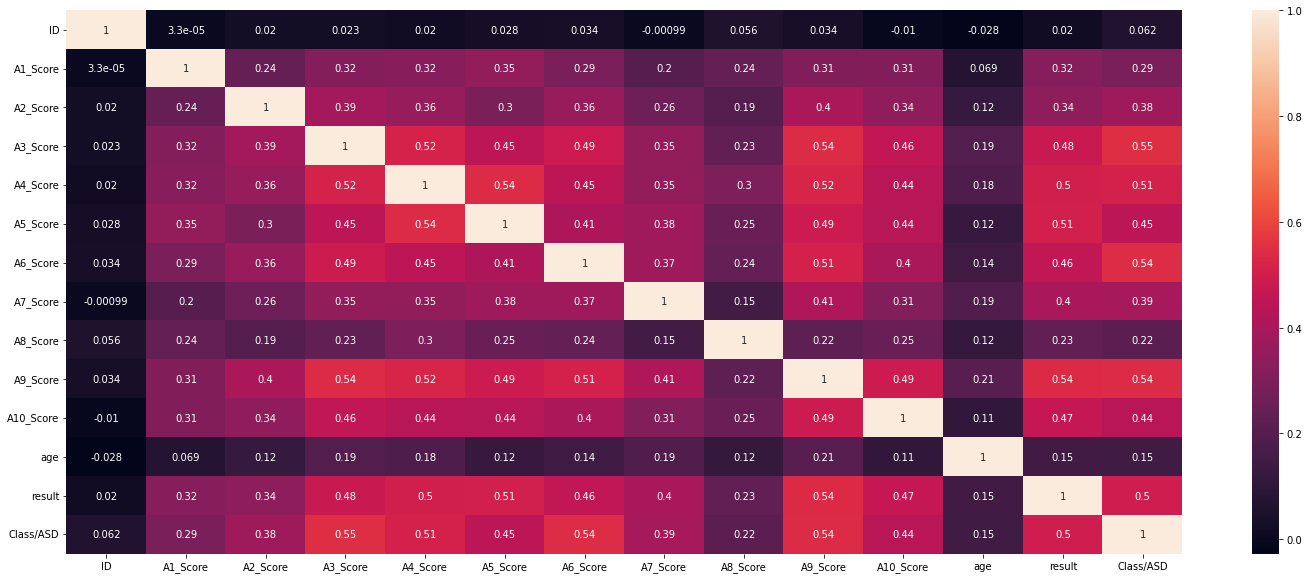

In [253]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True)

There is a weak negative correation of gender to autism

# **Data Preprocessing**

Dropping Unnecessary Columns

In [254]:
df.drop(labels=['ID','age_desc','relation','used_app_before'],axis=1,inplace=True)
tdf.drop(labels=['ID','age_desc','relation','used_app_before'],axis=1,inplace=True)

In [255]:
df['ethnicity'].value_counts() 

White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: ethnicity, dtype: int64

The dataset is Imbalanced

Replacing ? with Others

In [256]:
df.loc[df.ethnicity == '?', 'ethnicity'] = "Others"
df.loc[df.ethnicity == 'others', 'ethnicity'] = "Others"


tdf.loc[df.ethnicity == '?', 'ethnicity'] = "Others"
tdf.loc[df.ethnicity == 'others', 'ethnicity'] = "Others"

In [257]:
print('Gender -> ',df['gender'].unique(),'\n')
#print('Used_App -> ',df['used_app_before'].unique(),'\n')
print('Jaundice -> ',df['jaundice'].unique(),'\n')
print('Austim -> ',df['austim'].unique(),'\n')
print('Ethnicity -> ',df['ethnicity'].unique(),'\n')
print('Country_of_res -> ',df['contry_of_res'].unique(),'\n')

print('Gender -> ',tdf['gender'].unique(),'\n')
#print('Used_App -> ',df['used_app_before'].unique(),'\n')
print('Jaundice -> ',tdf['jaundice'].unique(),'\n')
print('Austim -> ',tdf['austim'].unique(),'\n')
print('Ethnicity -> ',tdf['ethnicity'].unique(),'\n')
print('Country_of_res -> ',tdf['contry_of_res'].unique(),'\n')

Gender ->  ['f' 'm'] 

Jaundice ->  ['no' 'yes'] 

Austim ->  ['no' 'yes'] 

Ethnicity ->  ['White-European' 'South Asian' 'Black' 'Asian' 'Middle Eastern ' 'Others'
 'Latino' 'Turkish' 'Hispanic' 'Pasifika'] 

Country_of_res ->  ['United States' 'Australia' 'United Kingdom' 'New Zealand' 'Italy'
 'Nicaragua' 'Canada' 'United Arab Emirates' 'Netherlands' 'Sri Lanka'
 'India' 'Armenia' 'Sierra Leone' 'Argentina' 'Azerbaijan' 'Iceland'
 'Egypt' 'Serbia' 'Afghanistan' 'Costa Rica' 'Jordan' 'Angola' 'Pakistan'
 'Brazil' 'Ireland' 'Kazakhstan' 'Viet Nam' 'Ethiopia' 'Austria' 'Finland'
 'France' 'Malaysia' 'Japan' 'Spain' 'Philippines' 'Iran' 'Czech Republic'
 'Russia' 'Romania' 'Mexico' 'Belgium' 'Aruba' 'Uruguay' 'Indonesia'
 'Ukraine' 'AmericanSamoa' 'Germany' 'China' 'Iraq' 'Tonga' 'South Africa'
 'Saudi Arabia' 'Hong Kong' 'Bahamas' 'Ecuador' 'Cyprus' 'Bangladesh'
 'Oman' 'Bolivia' 'Sweden' 'Niger'] 

Gender ->  ['m' 'f'] 

Jaundice ->  ['no' 'yes'] 

Austim ->  ['no' 'yes'] 

Ethnicity

In [258]:
from sklearn.preprocessing import LabelEncoder
lencode = LabelEncoder()

# Encoding Gender Column
df['gender'] = lencode.fit_transform(df['gender'].values)          

# Encoding Used_App_Before column
#df['used_app_before'] = lencode.fit_transform(df['used_app_before'].values)

# Encoding Jaundice column
df['jaundice'] = lencode.fit_transform(df['jaundice'].values)

# Encoding Austim column
df['austim'] = lencode.fit_transform(df['austim'].values)

# Encoding Ethnicity column
df['ethnicity'] = lencode.fit_transform(df['ethnicity'].values)

# Encoding County of Residence column
df['contry_of_res'] = lencode.fit_transform(df['contry_of_res'].values)


# Encoding Gender Column
tdf['gender'] = lencode.fit_transform(tdf['gender'].values)          

# Encoding Used_App_Before column
#df['used_app_before'] = lencode.fit_transform(df['used_app_before'].values)

# Encoding Jaundice column
tdf['jaundice'] = lencode.fit_transform(tdf['jaundice'].values)

# Encoding Austim column
tdf['austim'] = lencode.fit_transform(tdf['austim'].values)

# Encoding Ethnicity column
tdf['ethnicity'] = lencode.fit_transform(tdf['ethnicity'].values)

# Encoding County of Residence column
tdf['contry_of_res'] = lencode.fit_transform(tdf['contry_of_res'].values)

In [259]:
print('Gender -> ',df['gender'].unique(),'\n')
print('Jaundice -> ',df['jaundice'].unique(),'\n')
print('Austim -> ',df['austim'].unique(),'\n')
print('Ethnicity -> ',df['ethnicity'].unique(),'\n')
print('Country_of_res -> ',df['contry_of_res'].unique(),'\n')

print('Gender -> ',tdf['gender'].unique(),'\n')
#print('Used_App -> ',df['used_app_before'].unique(),'\n')
print('Jaundice -> ',tdf['jaundice'].unique(),'\n')
print('Austim -> ',tdf['austim'].unique(),'\n')
print('Ethnicity -> ',tdf['ethnicity'].unique(),'\n')
print('Country_of_res -> ',tdf['contry_of_res'].unique(),'\n')

Gender ->  [0 1] 

Jaundice ->  [0 1] 

Austim ->  [0 1] 

Ethnicity ->  [9 7 1 0 4 5 3 8 2 6] 

Country_of_res ->  [58  6 57 39 32 40 14 56 38 52 27  4 49  3  8 26 20 48  0 16 34  2 43 13
 31 35 60 21  7 22 23 36 33 51 44 29 18 46 45 37 11  5 59 28 55  1 24 15
 30 54 50 47 25  9 19 17 10 42 12 53 41] 

Gender ->  [1 0] 

Jaundice ->  [0 1] 

Austim ->  [0 1] 

Ethnicity ->  [ 1  0  5 10  4  7  2  3  8  6  9 11] 

Country_of_res ->  [40 29  6  8  5 23 42 33 14  9 18 41 27  1  4 30 12 28  0 20 10 37 15 11
 19  3  2 16 31 38 35 24 26 36 13 43 17 25 22 34 32 39  7 21] 



In [260]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'result',
       'Class/ASD'],
      dtype='object')

# **Model Building**

In [261]:
df.head(20)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,result,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18.605397,0,9,0,0,58,7.819715,0
1,0,0,0,0,0,0,0,0,0,1,13.829369,0,7,0,0,6,10.544296,0
2,1,1,1,1,1,1,0,0,1,1,14.679893,0,9,0,0,57,13.167506,1
3,0,0,0,1,0,0,0,0,0,0,61.035288,0,7,0,0,39,1.530098,0
4,0,0,0,0,1,0,0,0,1,1,14.256686,1,1,0,1,32,7.949723,0
5,1,0,0,0,0,0,0,1,0,0,15.578191,1,0,0,0,40,7.445003,0
6,1,1,1,1,1,1,0,1,0,0,21.366981,0,9,0,0,14,12.598583,0
7,0,0,0,0,0,0,0,0,0,0,28.930068,1,4,1,0,56,3.525720,0
8,1,1,1,1,1,1,1,1,1,0,20.305943,0,9,1,0,57,11.902461,1
9,0,0,0,0,0,0,1,1,0,1,17.964599,0,5,1,0,58,8.633346,1


In [262]:
tdf.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,result
0,0,0,0,0,0,0,0,1,0,0,13.445319,1,1,0,0,40,-0.914467
1,1,0,0,0,1,0,0,0,0,0,25.057229,0,0,1,0,29,4.553447


# **Model**

In [385]:
from typing_extensions import ParamSpec
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

features = ['age','jaundice','austim','result','A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score','A7_Score', 'A8_Score', 'A9_Score', 'A10_Score','gender','ethnicity','contry_of_res']

aucs = []
df_sub = tdf[[]].copy()

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=69)
for fold, (tr, val) in enumerate(kf.split(df[features], df['Class/ASD'])):
    print('FOLD:', fold)
    
    # split
    X_train = df.loc[tr, features]
    y_train = df.loc[tr, 'Class/ASD']
    X_val = df.loc[val, features]
    y_val = df.loc[val, 'Class/ASD']
    X_test = tdf[features]
    
    # fit
    params = {'objective':['binary:logistic'],
              'n_estimators':[20,50,100,200,500],
              'booster':['gbtree','gblinear'],
              'max_depth': [1,2,4, 6, 8, 10, 12],
              'learning_rate': [0.025, 0.05, 0.1, 0.3, 0.5]
              }
    xgc = xgb.XGBClassifier(random_state=69)
    model = GridSearchCV(xgc, param_grid=params)
    model.fit(X_train, y_train)
    
    # predict
    y_preds = model.predict(X_val)
    probs = model.predict_proba(X_val)[:, 1]
    
    # predict on test set
    df_sub[f'fold_{fold}'] = model.predict_proba(X_test)[:, 1]
    
    # metrics
    report = metrics.classification_report(y_val, y_preds)
    auc = metrics.roc_auc_score(y_val, probs)
    aucs.append(auc)
    print(report)
    print('AUC:', auc)
    print()
    
print('-' * 30)
print('Mean:', np.mean(aucs))
print('Std:', np.std(aucs))

FOLD: 0
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       123
           1       0.71      0.73      0.72        37

    accuracy                           0.87       160
   macro avg       0.81      0.82      0.82       160
weighted avg       0.87      0.87      0.87       160

AUC: 0.887716985277961

FOLD: 1
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       123
           1       0.81      0.59      0.69        37

    accuracy                           0.88       160
   macro avg       0.85      0.78      0.80       160
weighted avg       0.87      0.88      0.87       160

AUC: 0.9167215996484288

FOLD: 2
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       123
           1       0.74      0.62      0.68        37

    accuracy                           0.86       160
   macro avg       0.82      0.78      0.79       160
w

In [386]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val,y_preds)

TN, FP, FN, TP = confusion_matrix(y_val,y_preds).ravel() 

test_score = ( TP + TN ) / ( TP + TN + FN + FP )

print(cm)
print('Accuracy  = "{}"'.format(test_score))

[[114   9]
 [ 12  25]]
Accuracy  = "0.86875"


In [417]:
df_sub['Class/ASD'] = df_sub.filter(regex='fold_', axis=1).mean(axis=1)
df_sub

,fold_0,fold_1,fold_2,fold_3,fold_4,Class/ASD
0,0.021370,0.015321,0.028914,0.280369,0.013206,0.071836
1,0.040674,0.024112,0.045736,0.061717,0.030570,0.040562
2,0.119609,0.111493,0.096856,0.331711,0.074451,0.146824
3,0.420945,0.341489,0.450206,0.492493,0.616776,0.464382
4,0.333161,0.263875,0.344697,0.211866,0.164257,0.263571
...,...,...,...,...,...,...
195,0.025790,0.025177,0.043332,0.058619,0.034858,0.037555
196,0.469075,0.331883,0.464103,0.485343,0.696288,0.489338
197,0.452217,0.325596,0.462880,0.636799,0.436875,0.462874
198,0.826343,0.762640,0.783743,0.773748,0.854225,0.800140


# **Submission**

In [418]:
submission = pd.read_csv('sample_submission.csv')

In [419]:
submission['Class/ASD'] = df_sub['Class/ASD']

In [420]:
submission

,ID,Class/ASD
0,1,0.071836
1,2,0.040562
2,3,0.146824
3,4,0.464382
4,5,0.263571
...,...,...
195,196,0.037555
196,197,0.489338
197,198,0.462874
198,199,0.800140


In [421]:
submission.to_csv('xgb_submission2.csv' , index = False)